In [ ]:
!git clone https://github.com/Seung-hwanSong/LGES2023_Clustering.git #코랩 사용

# [Clustering]
# K-Means Clustering / Hierachical Clustering / Density-based Clustering
## [K-Means Clustering]

##### jupyter notebook 단축키

- ctrl+enter: 셀 실행   
- shift+enter: 셀 실행 및 다음 셀 이동   
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- 함수 ( ) 안에서 shift+tab: arguments description. shift+tab+tab은 길게 볼 수 있도록

## 1. 모듈 불러오기

In [ ]:
''' 기본 모듈 및 시각화 모듈 '''
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# backend for rendering plots within the browser

''' 데이터 전처리 모듈 '''
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

''' K-Means Clustering 모듈 '''
from sklearn.cluster import KMeans

## 2. 분석데이터: Toy Example Data Set


In [ ]:
# 2개의 다른 Cluster에 속하는 30개의 데이터 포인트 생성
# x1 is the first feature and x2 is the second feature

x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

In [ ]:
# 각 데이터 포인트를 Cluster에 할당하는 함수 정의

colors_map = np.array(['b', 'r'])

def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

In [ ]:
# 각 Cluster의 중심을 업데이트하는 함수 정의
# update means

def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

In [ ]:
# Cluster 중심 및 데이터 포인트에 대한 Plot 함수 정의

def plot_points(centroids=None, colors='g', figure_title=None):
    fig = plt.figure(figsize=(15, 10))  # create a figure object

    ax = fig.add_subplot(1, 1, 1)
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)

    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)

    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)

    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

In [ ]:
# Initialize k-means - plot data points

plot_points(figure_title='Scatter Plot of $x2$ vs $x1$')

In [ ]:
# Initialize k-means - randomly define clusters and add them to plot

centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-means Initialization')

In [ ]:
# Run k-means (4-iterations)

number_of_iterations = 4

for i in range(number_of_iterations):

    print('Iteration {} - Update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

    print('Iteration {} - Update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

## 3. 분석데이터: Generating Data set


### [Inputs]

    - n_samples: The total number of points equally divided among clusters. Value will be: 5000
    - centers: The number of centers to generate, or the fixed center locations. Value will be: [[4, 4], [-2, -1], [2, -3],[1, 1]]
    - cluster_std: The standard deviation of the clusters. Value will be: 0.9

### [Output]
    - X: Array of shape [n_samples, n_features]. (generated samples)
    - y: Array of shape [n_samples]. (integer labels)


In [ ]:
# Generating the Data

np.random.seed(2023)
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [ ]:
display(X)
display(y)

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
# Display the scatter plot of the randomly generated data.

plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

> 최적의 k 찾기 (1): 이론강의 3가지

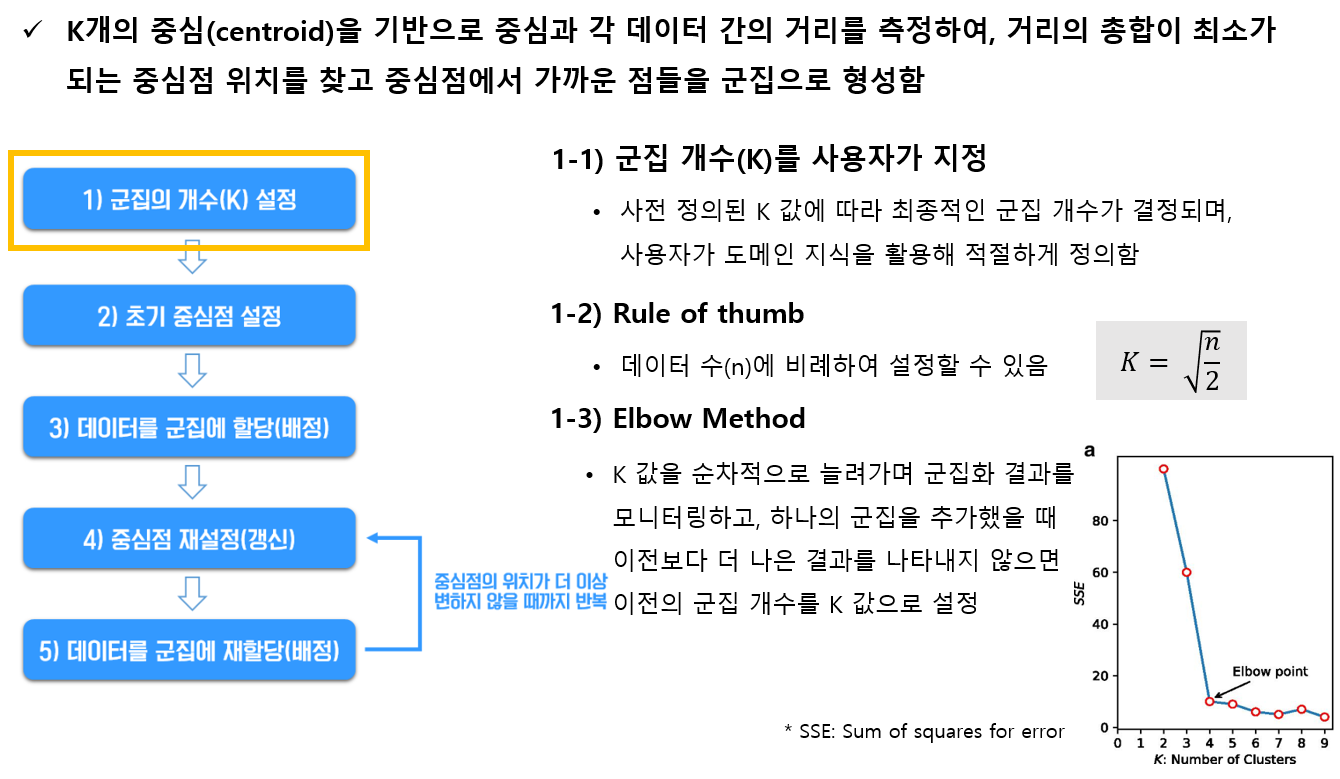




> 최적의 k 찾기 (2): k-means ++ algorithm

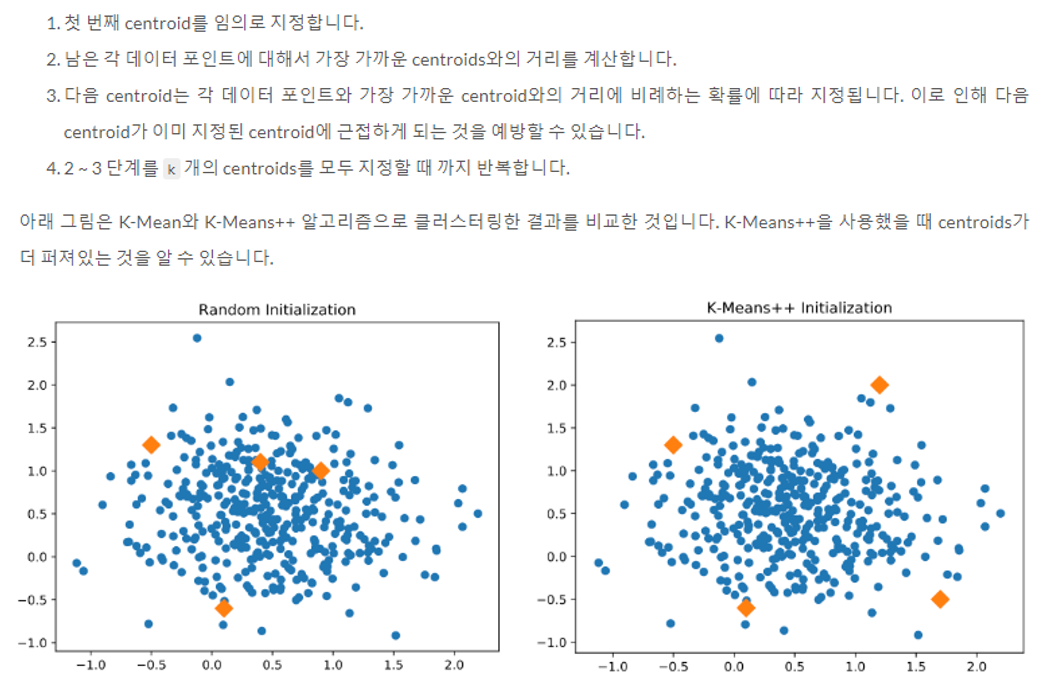

## 4. K-Means


### [options]
    - init: 초기화 방법 
    --> "random" (무작위)
    --> "k-means++" (smart way to speed up convergence)
    - n_clusters: 군집의 개수
    - n_init: 초기 중심 위치 시도 횟수 (default: 10) - 무작위 시도 횟수 중 가장 좋은 값을 선택
    - max_iter: 최대 반복 횟수

In [ ]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12,random_state=2023)

# Fit
k_means.fit(X)

In [ ]:
# 각 데이터에 할당된 label 확인

k_means_labels = k_means.labels_
k_means_labels

In [ ]:
# CLuster 중심 좌표 확인

k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

In [ ]:
# Visualizing the Resulting Clusters

fig = plt.figure(figsize=(15, 10))

# Color map을 사용한 색상 배열 생성 (Label 수를 기반으로 생성) 
# set(k_means_label): to get the unique label
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # 지정된 클러스터에 속하면 True로 labeling
    my_members = (k_means_labels == k)

    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

## 4.1 K-Means Application: Clustomer Segmentation

In [ ]:
customers_df = pd.read_csv('/content/LGES2023_Clustering/data/Cust_Segmentation.csv')
# customers_df = pd.read_csv('./data/Cust_Segmentation.csv') # 로컬

customers_df.head()

### Preprocessing: 불필요한 Columns 삭제

In [ ]:
df = customers_df.drop('Address', axis=1)
df.head()

### 정규화 (Standardization)

In [ ]:
X = df.values[:,1:] # Customer Id를 제외한 값 indexing
X = np.nan_to_num(X) # NaN(Not a Number)을 0으로 바꾸

cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

### K-Means modeling

In [ ]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12, random_state=2023)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

### Dataframe 구성

In [ ]:
df["Labels"] = labels
df.head()

### Clustering 결과 확인

In [ ]:
df.groupby('Labels').mean()

## 4.2 K-Means Limitation to Linear Cluster Boundaries

### 초승달 모양 클러스터 데이터를 생성 (2 Cluster)

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=2023)

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

### K-Means 적용

In [ ]:
labels = KMeans(2, random_state=2023).fit_predict(X)

fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, edgecolor="k", linewidth=2)

plt.title("Incorrect Results")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

### Spectral 형태에 대한 다른 clustering 방법 적용 (올바른 예시)

In [ ]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)

fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, edgecolor="k", linewidth=2)

plt.title("Correct Results")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# EOD